<a href="https://colab.research.google.com/github/hamsik1223/COMS4995-Applied-Deep-Learning/blob/master/Assignments/HW3/a3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3: Three practical tools: TensorBoard, LIME, Keras Tuner

## About

In this assignment, you will gain hands-on experience with three practical tools. This assignment also includes several questions which require written responses (length: about a paragraph each). Please write your answers in this notebook in the text cells provided.

Starter code showing how to use TensorBoard.dev is provided at the end of this notebook.

## Submission instructions

To submit this assignment, please save your notebook (with output), and upload it to CourseWorks.

# Section 1: Run experiments and visualize your results using TensorBoard

Deep Learning is a new and developing field. Frequently, papers are published introducing new activation functions, weight initialization strategies,  optimizers, and layers. These papers often include results on large dataets (ImageNet), but whether the techniques they introduce will generalize to your datasets (which are often much smaller) remains unclear. The best way to determine that is by running an experiment.

## Swish

The current "default" activation function is ReLU (informally, our experience is that while it may not be optimal for all datasets, it is usually a reasonable choice). In the paper [Searching for Activation Functions](https://arxiv.org/abs/1710.05941), the authors propose a new activation function called "Swish", which they believe may become the default in the future. 

## Written Answers
Please answer the following questions with a clear and concice one paragraph response each.

## 1a) Why is ReLU activation prefered over Sigmoid?

### TODO: your answer here
Deep networks with ReLUs are more easily optimized than networks with sigmoid units, because gradients are able to flow when
the input to the ReLU function is positive.

## 1b) What is the Vanishing Gradient problem? Specifically, when and why does it occur in a MLP?

### TODO: your answer here
The problem of vanishing gradient is that the gradient easily reaches 0 after backpropagation, leading to no update for the weights.
Usually it happens when people are using sigmoid activation function. And it is beacuse that the sigmoid function's derivative is very small (the range is about 0 to 0.25), and then if we have lots of hidden layers, those small number times together and results in a really small derivative


## Programming questions
Please answer the following questions by writing code in this notebook (in the cells provided below) and saving your output.

## 1c) Implement the Swish activation function using TensorFlow 2.1

Note: Swish is [available](https://www.tensorflow.org/api_docs/python/tf/keras/activations/swish) in tf-nightly. Do not use the built-in implemention. Instead, you should write a custom activation function (as if it was not yet available in the codebase). You do *not* need to extend TensorFlow to make your Swish implementation available everywhere (just write code to make it work in this notebook).

In [0]:
# TODO: your code here
# Feel free to add additional code cells if helpful
def swish(x, beta):
  return x*tf.sigmoid(beta*x)


## 1d) Run an experiment to see whether Swish is helpful on a small dataset

- Choose a small datasets (e.g., CIFAR-10). 
- Train two NNs: One using ReLu activation, and one using your Swish implementation. 
- Visualize the learning curves for training & validation loss and accuracy using TensorBoard.dev (you can find starter code for TensorBoard.dev at the bottom of this notebook). 
- Fix the TensorFlow random seed before running these experiments, so your results are reproducibile (you can find a notebook on CourseWorks that demonstrates how to fix the seed).

Note: It may be difficult to see whether Swish is helpful with a small experiment like this, and it's likely that your learning curves will be noisy. You do not need to run a perfect experiment (the goal is for you to gain experience implementing a custom activation function, and to learn how to use TensorBoard).


In [2]:
# TODO: your code here
# You may add additional code cells if helpful
# You can find example code for TensorBoard.dev at the bottom of this notebook
%tensorflow_version 2.x
import tensorflow as tf
cifar10_data = tf.keras.datasets.cifar10.load_data()

TensorFlow 2.x selected.


In [0]:
train = cifar10_data[0]; valid =  cifar10_data[1]
x_train = train[0]; y_train = train[1]
x_test = valid[0]; y_test = valid[1]

In [4]:
!pip install -U tensorboard
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

     |████████████████████████████████| 3.9MB 7.5MB/s 
ERROR: tensorflow-federated 0.11.0 requires enum34~=1.1, which is not installed.
ERROR: tensorflow-federated 0.11.0 has requirement attrs~=18.2, but you'll have attrs 19.3.0 which is incompatible.
ERROR: tensorflow-federated 0.11.0 has requirement cachetools~=3.1.1, but you'll have cachetools 4.0.0 which is incompatible.
ERROR: tensorflow-federated 0.11.0 has requirement grpcio~=1.24.3, but you'll have grpcio 1.27.2 which is incompatible.
ERROR: tensorflow-federated 0.11.0 has requirement tensorflow~=2.0.0, but you'll have tensorflow 2.1.0 which is incompatible.
ERROR: tensorflow-federated 0.11.0 has requirement tensorflow-addons~=0.6.0, but you'll have tensorflow-addons 0.8.2 which is incompatible.
  Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0


In [0]:
#def our model based different activation function
def create_model(act_fun = 'relu'):
  tf.random.set_seed(2020)
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=act_fun, 
                          input_shape=(32, 32, 3)))
  model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=act_fun, 
                          input_shape=(32, 32, 3)))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation=act_fun))
  model.add(tf.keras.layers.Dropout(0.5))
  
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [14]:
import datetime 
import os
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

model = create_model() 
exp_dir = os.path.join(log_dir, "CIFAR-10-EXP1-RELU")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=50, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Writing logs to ./tensorboard-logs/20200316-182610
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 163us/sample - loss: 2.6067 - accuracy: 0.1065 - val_loss: 2.2585 - val_accuracy: 0.1512
Epoch 2/50
50000/50000 [==============================] - 8s 162us/sample - loss: 2.1754 - accuracy: 0.1439 - val_loss: 1.8936 - val_accuracy: 0.2471
Epoch 3/50
50000/50000 [==============================] - 8s 153us/sample - loss: 1.8609 - accuracy: 0.2865 - val_loss: 1.6038 - val_accuracy: 0.4087
Epoch 4/50
50000/50000 [==============================] - 8s 151us/sample - loss: 1.6411 - accuracy: 0.3960 - val_loss: 1.4682 - val_accuracy: 0.4629
Epoch 5/50
50000/50000 [==============================] - 8s 151us/sample - loss: 1.4902 - accuracy: 0.4626 - val_loss: 1.3042 - val_accuracy: 0.5320
Epoch 6/50
50000/50000 [==============================] - 8s 151us/sample - loss: 1.3918 - accuracy: 0.5027 - val_loss: 1.2905 - val_accuracy: 0.5429

In [15]:
def swish_1(x):
  return (swish(x,1)) 
model = create_model(swish_1) 
exp_dir = os.path.join(log_dir, "CIFAR-10-EXP-SWISH1")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=50, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 173us/sample - loss: 2.4384 - accuracy: 0.2360 - val_loss: 1.6977 - val_accuracy: 0.3779
Epoch 2/50
50000/50000 [==============================] - 8s 162us/sample - loss: 1.6766 - accuracy: 0.3885 - val_loss: 1.4511 - val_accuracy: 0.4758
Epoch 3/50
50000/50000 [==============================] - 8s 162us/sample - loss: 1.4278 - accuracy: 0.4911 - val_loss: 1.3090 - val_accuracy: 0.5342
Epoch 4/50
50000/50000 [==============================] - 8s 159us/sample - loss: 1.2709 - accuracy: 0.5521 - val_loss: 1.2141 - val_accuracy: 0.5718
Epoch 5/50
50000/50000 [==============================] - 8s 160us/sample - loss: 1.1765 - accuracy: 0.5862 - val_loss: 1.2138 - val_accuracy: 0.5723
Epoch 6/50
50000/50000 [==============================] - 8s 159us/sample - loss: 1.0986 - accuracy: 0.6142 - val_loss: 1.1811 - val_accuracy: 0.5877
Epoch 7/50
50000/50000 [==========================

In [16]:
!tensorboard dev upload --logdir "$log_dir"


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorboard-logs/20200316-182610

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=u7pc0cN1YebKYchxu2qcM3RINE7amo&prompt=consen

## 1e) Include a brief written answer to the following questions:
- Did Swish help your NNs reach a higher validation accuracy? 
- Did it reduce the time (in terms of training epochs) needed to reach a certain accuracy?
- Please include the URLs showing the results of your experiments in TensorBoard.dev to justify your results.

### TODO: your answer here
- Comparing the maximum value of the validation accuracy, we can conclude that model using Swish leads to a higher validation accuracy (61.5%), and that of model using RELU is about 60%. 
- The time reaching the same level of train accuracy is lower for model using swish, since the accuracy curve is always on the top of the other curve. 
- The URL is:https://tensorboard.dev/experiment/VYIkCvWdQGGs8c0loLzAtg/

# Section 2: Use LIME to explain an image classifier

Explaining and interpreting models is a new and increasingly important area of Deep Learning. In this section, you will gain experience using a recent (and relatively simple) technique called LIME.

## Written answers

## 2a) Read the paper [ConvNets and ImageNet Beyond Accuracy: Understanding Mistakes and Uncovering Biases](https://arxiv.org/abs/1711.11443) then answer the following two questions:
- Why would a model misclassify a professional sports player based on the color of their skin?
- What changes would you make to the training set to correct this behavior?

### TODO: your answer here
- The possible reason is that black persons are more represented in the baskectball class in comparison to the other classes, while Asian persons are more presented in the ping-pong ball class. Hence the model wrongly learned the skin of the person instead of the basketball or ping-pong ball. 
- Possible solutions to that are: 
1. Do data augmentation, for example, include or create more pictures where Asian persons are playing baskectball or black persons are playing ping-pong ball. 


## Programming questions

## 2b) Read the paper ["Why Should I Trust You?": Explaining the Predictions of Any Classifier](https://arxiv.org/abs/1602.04938) then practice using LIME by adding code below to do the following:
- Install LIME
- Download an image from the web (using `!wget` or a similar utility).
- Classify your image using Inception-V3 (or another famous architecture, using weights pretrained on ImageNet).
- Display the top three predicted classes (e.g., baseball player) and confidence scores.
- Use LIME to provide evidence for and against each of the top three predictions (e.g., display the regions of an image that LIME found to correlate most strongly with and against the predicted class).

Save your output inside this notebook and include it with your submission.

In [17]:
# TODO: your code here
# You may add additional text cells if helpful
!pip install lime

     |████████████████████████████████| 276kB 8.7MB/s 
  Created wheel for lime: filename=lime-0.1.1.37-cp36-none-any.whl size=284277 sha256=5a50d86a51b4040777eb3f18989bb23cd718867661497dda0f99f962c7d15e67
  Stored in directory: /root/.cache/pip/wheels/c1/38/e7/50d75d4fb75afa604570dc42f20c5c5f5ab26d3fbe8d6ef27b
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12074 sha256=723f5b7b13b45d5feac3369eb4e577a4a781174dfcca33301eaa89a36afe1cd5
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built lime progressbar


In [61]:
!wget https://apopka-1x1yusplq.stackpathdns.com/wp-content/uploads/2017/12/gfhdgfgfgdfgdf.jpg
!wget https://www.petsworld.in/blog/wp-content/uploads/2015/05/dog-kitten.jpg

--2020-03-16 18:56:50--  https://apopka-1x1yusplq.stackpathdns.com/wp-content/uploads/2017/12/gfhdgfgfgdfgdf.jpg
Resolving apopka-1x1yusplq.stackpathdns.com (apopka-1x1yusplq.stackpathdns.com)... 151.139.242.13
Connecting to apopka-1x1yusplq.stackpathdns.com (apopka-1x1yusplq.stackpathdns.com)|151.139.242.13|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://root.coreylittle.com/apopkav/2017/12/gfhdgfgfgdfgdf.jpg [following]
--2020-03-16 18:56:50--  https://root.coreylittle.com/apopkav/2017/12/gfhdgfgfgdfgdf.jpg
Resolving root.coreylittle.com (root.coreylittle.com)... 184.168.169.98
Connecting to root.coreylittle.com (root.coreylittle.com)|184.168.169.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189624 (185K) [image/jpeg]
Saving to: ‘gfhdgfgfgdfgdf.jpg’

gfhdgfgfgdfgdf.jpg  100%[===================>] 185.18K   642KB/s    in 0.3s    

2020-03-16 18:56:51 (642 KB/s) - ‘gfhdgfgfgdfgdf.jpg’ saved [189624/189624

In [0]:
image_path = 'dog-kitten.jpg'

In [0]:
IMG_SIZE = 299
def load_and_preprocess_image(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
  img /= 255.0  # normalize pixels to 0,1
  return img
image = load_and_preprocess_image(image_path)

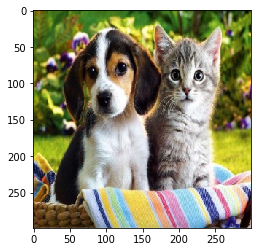

In [77]:
image_np = image.numpy()
import matplotlib.pyplot as plt
plt.imshow(image_np)

In [78]:
model2b = tf.keras.applications.InceptionV3()
model2b.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_388 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 149, 149, 32) 96          conv2d_388[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 149, 149, 32) 0           batch_normalization_376[0][0]    
_______________________________________________________________________________________

In [0]:
pred_prob = model2b.predict(tf.expand_dims(image, 0), steps = 1)

In [0]:
import numpy as np
top3class = np.argsort(pred_prob)[0][::-1][0:3]

In [81]:
#get label names of imagenet 
!wget https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

--2020-03-16 18:58:37--  https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet1000_clsidx_to_labels.txt.5’

imagenet1000_clsidx 100%[===================>]  29.85K  --.-KB/s    in 0.005s  

2020-03-16 18:58:37 (6.41 MB/s) - ‘imagenet1000_clsidx_to_labels.txt.5’ saved [30564/30564]



In [0]:
label_name = open('/content/imagenet1000_clsidx_to_labels.txt')
label_dict = {}
for lines in label_name.readlines():
  key = int(lines.split(":")[0][1:])
  val = lines.split(":")[1][2:].split(",")[0]
  if val[len(val)-1]=='\'':
    val = val[:(len(val)-1)]
  label_dict[key] = val

In [83]:
#TOP 3 predicted classes
print('Top 3 classes are:')
print(top3class[0],label_dict[top3class[0]], pred_prob[0][top3class[0]])
print(top3class[1],label_dict[top3class[1]],pred_prob[0][top3class[1]])
print(top3class[2],label_dict[top3class[2]],pred_prob[0][top3class[2]])

Top 3 classes are:
162 beagle 0.8657647
167 English foxhound 0.007300014
428 barrow 0.0041064657


In [84]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

image_np = image.numpy()
explanation = explainer.explain_instance(image_np, model2b.predict, top_labels=3, hide_color=0, num_samples=1000)

In [0]:
from skimage.segmentation import mark_boundaries
def show_explain(rank, label_num, label_name, label_prob, num_feat = 5):
  temp, mask = explanation.get_image_and_mask(label_num, positive_only=True, num_features=num_feat, hide_rest=True)
  plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
  plt.title('Top'+ str(rank) +'class:'+ label_name + 'prob =' + str(label_prob))
  plt.xticks([])
  plt.yticks([])
  plt.show()

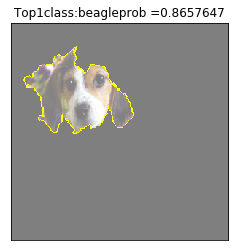

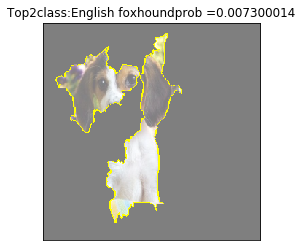

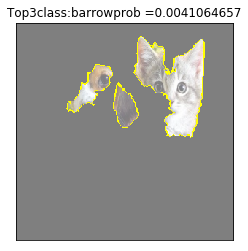

In [86]:
show_explain(1, top3class[0],label_dict[top3class[0]], pred_prob[0][top3class[0]])
show_explain(2, top3class[1],label_dict[top3class[1]], pred_prob[0][top3class[1]])
show_explain(3, top3class[2],label_dict[top3class[2]], pred_prob[0][top3class[2]])

**Comment**
This picture contains both a cat and a dog. However, the mode InceptionV3 only detected the dog in top 2 classes (beagle and English foxhound). Also, pixels found by LIME shows that the model has captured the dog area when predicting on those 2 classes. The model didn't recogonize cat probability because there is not too many cat samples when training.

**Optional**

If you like to learn about another promising approach to explaining NNs, you can read the paper [Axiomatic Attribution for Deep Networks](https://arxiv.org/abs/1703.01365).

# Section 3: Use Keras Tuner to optimize a small model


## Written answers

## 3a) When and why might Grid Search be less effective than Random Search when searching for useful hyperparameters for a Deep Learning model?


### TODO: your answer here
- When the dimension of the hyperparameters ($p$) is really high. The search space will grow exponetially as $p$ increases, which makes grid search extremely time consuming. 
- When some hyperparameter's searching space is very range, the options will be too many, leading to expensive searching cost. 


## Programming questions

**3b) Add one or more code cells below in which you complete the following:**
- Install Keras Tuner
- Write a CNN to classify images from CIFAR-10 
- Use Keras Tuner to search for at least three optimal hyperpameters for your model (eg, number of layers, number of filters per layer, dropout rate, etc)

Save your output in this notebook.


In [4]:
# TODO: your code here
# You may add additional code cells if helpful
!pip install keras-tuner

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


In [0]:
#def our model based different activation function
act_fun = 'relu'
def create_model_fortune(hp):
  model = tf.keras.models.Sequential()
  filter_size = hp.Int('filter size', min_value=3, max_value=7, step=2)
  model.add(tf.keras.layers.Conv2D(16, (filter_size, filter_size), activation=act_fun, 
                          input_shape=(32, 32, 3)))
  model.add(tf.keras.layers.Conv2D(16, (filter_size, filter_size), activation=act_fun))
  model.add(tf.keras.layers.MaxPooling2D())
  model.add(tf.keras.layers.Flatten())
  dense_layer_size = 128
  drop_out = hp.Float('Drop out', min_value = 0.2, max_value = 0.6, step = 0.15)
  model.add(tf.keras.layers.Dense(dense_layer_size, activation=act_fun))
  model.add(tf.keras.layers.Dense(dense_layer_size, activation=act_fun))
  model.add(tf.keras.layers.Dropout(drop_out))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
tuner = RandomSearch(
    create_model_fortune,
    objective='val_accuracy',
    max_trials=100,
    executions_per_trial=3,
    project_name='hw3')

In [28]:
tuner.search_space_summary()
tuner.search(x_train, y_train,
             epochs=20,
             validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 141us/sample - loss: 2.4175 - accuracy: 0.2806 - val_loss: 1.6470 - val_accuracy: 0.4079
Epoch 2/20
50000/50000 [==============================] - 6s 127us/sample - loss: 1.4582 - accuracy: 0.4819 - val_loss: 1.3106 - val_accuracy: 0.5377
Epoch 3/20
50000/50000 [==============================] - 6s 126us/sample - loss: 1.2055 - accuracy: 0.5762 - val_loss: 1.2272 - val_accuracy: 0.5786
Epoch 4/20
50000/50000 [==============================] - 6s 130us/sample - loss: 1.0470 - accuracy: 0.6303 - val_loss: 1.2004 - val_accuracy: 0.5992
Epoch 5/20
50000/50000 [==============================] - 6s 130us/sample - loss: 0.9215 - accuracy: 0.6766 - val_loss: 1.2737 - val_accuracy: 0.5983
Epoch 6/20
50000/50000 [==============================] - 6s 128us/sample - loss: 0.8030 - accuracy: 0.7209 - val_loss: 1.2693 - val_accuracy: 0.6025
Epoch 7/20
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 139us/sample - loss: 2.1508 - accuracy: 0.2601 - val_loss: 1.6247 - val_accuracy: 0.4045
Epoch 2/20
50000/50000 [==============================] - 7s 131us/sample - loss: 1.5363 - accuracy: 0.4513 - val_loss: 1.3671 - val_accuracy: 0.5182
Epoch 3/20
50000/50000 [==============================] - 6s 129us/sample - loss: 1.3449 - accuracy: 0.5321 - val_loss: 1.3256 - val_accuracy: 0.5402
Epoch 4/20
50000/50000 [==============================] - 6s 128us/sample - loss: 1.2287 - accuracy: 0.5763 - val_loss: 1.2856 - val_accuracy: 0.5514
Epoch 5/20
50000/50000 [==============================] - 7s 131us/sample - loss: 1.1364 - accuracy: 0.6055 - val_loss: 1.1938 - val_accuracy: 0.5864
Epoch 6/20
50000/50000 [==============================] - 7s 131us/sample - loss: 1.0609 - accuracy: 0.6323 - val_loss: 1.3028 - val_accuracy: 0.5683
Epoch 7/20
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 145us/sample - loss: 2.4290 - accuracy: 0.1388 - val_loss: 2.1223 - val_accuracy: 0.1998
Epoch 2/20
50000/50000 [==============================] - 6s 129us/sample - loss: 2.0308 - accuracy: 0.2401 - val_loss: 1.8467 - val_accuracy: 0.3056
Epoch 3/20
50000/50000 [==============================] - 6s 128us/sample - loss: 1.7116 - accuracy: 0.3743 - val_loss: 1.5269 - val_accuracy: 0.4437
Epoch 4/20
50000/50000 [==============================] - 6s 127us/sample - loss: 1.5131 - accuracy: 0.4585 - val_loss: 1.4451 - val_accuracy: 0.4861
Epoch 5/20
50000/50000 [==============================] - 7s 131us/sample - loss: 1.3814 - accuracy: 0.5118 - val_loss: 1.3663 - val_accuracy: 0.5069
Epoch 6/20
50000/50000 [==============================] - 7s 131us/sample - loss: 1.2820 - accuracy: 0.5468 - val_loss: 1.4106 - val_accuracy: 0.5128
Epoch 7/20
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 134us/sample - loss: 2.4558 - accuracy: 0.2210 - val_loss: 1.7856 - val_accuracy: 0.3473
Epoch 2/20
50000/50000 [==============================] - 6s 126us/sample - loss: 1.7043 - accuracy: 0.3838 - val_loss: 1.4709 - val_accuracy: 0.4678
Epoch 3/20
50000/50000 [==============================] - 6s 126us/sample - loss: 1.4246 - accuracy: 0.4992 - val_loss: 1.2848 - val_accuracy: 0.5392
Epoch 4/20
50000/50000 [==============================] - 6s 126us/sample - loss: 1.2564 - accuracy: 0.5624 - val_loss: 1.2135 - val_accuracy: 0.5802
Epoch 5/20
50000/50000 [==============================] - 7s 130us/sample - loss: 1.1171 - accuracy: 0.6113 - val_loss: 1.2269 - val_accuracy: 0.5821
Epoch 6/20
50000/50000 [==============================] - 6s 128us/sample - loss: 1.0113 - accuracy: 0.6502 - val_loss: 1.1813 - val_accuracy: 0.6007
Epoch 7/20
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 136us/sample - loss: 2.4040 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 2/20
50000/50000 [==============================] - 6s 129us/sample - loss: 2.3025 - accuracy: 0.0983 - val_loss: 2.3001 - val_accuracy: 0.1031
Epoch 3/20
50000/50000 [==============================] - 6s 125us/sample - loss: 2.3024 - accuracy: 0.1004 - val_loss: 2.3025 - val_accuracy: 0.1007
Epoch 4/20
50000/50000 [==============================] - 6s 125us/sample - loss: 2.3029 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.1006
Epoch 5/20
50000/50000 [==============================] - 6s 125us/sample - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1003
Epoch 6/20
50000/50000 [==============================] - 6s 127us/sample - loss: 2.3035 - accuracy: 0.0983 - val_loss: 2.3024 - val_accuracy: 0.1004
Epoch 7/20
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 133us/sample - loss: 2.0859 - accuracy: 0.3454 - val_loss: 1.4569 - val_accuracy: 0.4738
Epoch 2/20
50000/50000 [==============================] - 6s 126us/sample - loss: 1.3518 - accuracy: 0.5225 - val_loss: 1.2356 - val_accuracy: 0.5674
Epoch 3/20
50000/50000 [==============================] - 7s 130us/sample - loss: 1.1592 - accuracy: 0.6012 - val_loss: 1.2029 - val_accuracy: 0.5838
Epoch 4/20
50000/50000 [==============================] - 6s 127us/sample - loss: 1.0349 - accuracy: 0.6432 - val_loss: 1.1739 - val_accuracy: 0.6002
Epoch 5/20
50000/50000 [==============================] - 6s 127us/sample - loss: 0.9326 - accuracy: 0.6801 - val_loss: 1.2081 - val_accuracy: 0.6031
Epoch 6/20
50000/50000 [==============================] - 6s 125us/sample - loss: 0.8438 - accuracy: 0.7127 - val_loss: 1.1879 - val_accuracy: 0.6185
Epoch 7/20
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 136us/sample - loss: 1.9946 - accuracy: 0.3227 - val_loss: 1.6453 - val_accuracy: 0.4056
Epoch 2/20
50000/50000 [==============================] - 7s 133us/sample - loss: 1.5916 - accuracy: 0.4282 - val_loss: 1.5267 - val_accuracy: 0.4480
Epoch 3/20
50000/50000 [==============================] - 7s 130us/sample - loss: 1.4845 - accuracy: 0.4755 - val_loss: 1.4567 - val_accuracy: 0.4884
Epoch 4/20
50000/50000 [==============================] - 6s 127us/sample - loss: 1.3828 - accuracy: 0.5127 - val_loss: 1.4457 - val_accuracy: 0.4960
Epoch 5/20
50000/50000 [==============================] - 6s 126us/sample - loss: 1.3236 - accuracy: 0.5367 - val_loss: 1.3914 - val_accuracy: 0.5236
Epoch 6/20
50000/50000 [==============================] - 6s 126us/sample - loss: 1.2618 - accuracy: 0.5610 - val_loss: 1.4939 - val_accuracy: 0.4892
Epoch 7/20
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 135us/sample - loss: 2.3380 - accuracy: 0.0987 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/20
50000/50000 [==============================] - 6s 125us/sample - loss: 2.3025 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
50000/50000 [==============================] - 6s 125us/sample - loss: 2.3030 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.1006
Epoch 4/20
50000/50000 [==============================] - 6s 126us/sample - loss: 2.3040 - accuracy: 0.0960 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 5/20
50000/50000 [==============================] - 6s 130us/sample - loss: 2.3031 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/20
50000/50000 [==============================] - 6s 126us/sample - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
50000/50000 [==========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 140us/sample - loss: 2.2737 - accuracy: 0.1693 - val_loss: 1.8711 - val_accuracy: 0.2878
Epoch 2/20
50000/50000 [==============================] - 6s 129us/sample - loss: 1.7358 - accuracy: 0.3608 - val_loss: 1.5543 - val_accuracy: 0.4423
Epoch 3/20
50000/50000 [==============================] - 6s 130us/sample - loss: 1.4896 - accuracy: 0.4690 - val_loss: 1.4957 - val_accuracy: 0.4811
Epoch 4/20
50000/50000 [==============================] - 6s 129us/sample - loss: 1.3263 - accuracy: 0.5317 - val_loss: 1.3146 - val_accuracy: 0.5372
Epoch 5/20
50000/50000 [==============================] - 7s 132us/sample - loss: 1.1979 - accuracy: 0.5771 - val_loss: 1.3397 - val_accuracy: 0.5433
Epoch 6/20
50000/50000 [==============================] - 6s 129us/sample - loss: 1.0835 - accuracy: 0.6149 - val_loss: 1.3025 - val_accuracy: 0.5524
Epoch 7/20
50000/50000 [==========================

INFO:tensorflow:Oracle triggered exit


In [29]:
best_model = tuner.get_best_models(num_models=1)
best_model[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [35]:
tuner.results_summary()

## 3c) In the text cell below, brielfy answer the following questions:
- What were the optimal hyperparmeters you found?
- Do they make sense (e.g., are they similar to parameters you might have picked yourself?)


### TODO: your answer here
- The best result is reached when Drop out: 0.35 and filter size: 3
- Usually I will choose the filter size 3, while for the drop out rate it depends on the number of neurons in a layer.

---

## Starter code for TensorBoard
The following code shows how to use [TensorBoard](https://www.tensorflow.org/tensorboard) to display the results from an experiment comparing two learning curves. Please note, there are three ways to use TensorBoard. 
- You may install TensorBoard locally on your laptop
- You can run TensorBoard inside Colab (currently buggy)
- You can use TensorBoard.dev (this is the approach you should use for this assignment). 

In [0]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
!pip install -U tensorboar

     |████████████████████████████████| 3.9MB 8.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import tensorflow as tf

**Caution**. The following cell will delete any existing TensorBoard logs. If you're running this on your local machine, please be careful executing it.

In [0]:
!rm -rf ./tensorboard-logs/ # Clear any logs from previous runs

Import a dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


## First style
The following code shows how to use TensorBoard with ```model.fit```.

In [0]:
from tensorflow.keras.layers import Dense, Flatten

def create_model():
  model = tf.keras.models.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='softmax'),
  ])
  return model

Create a logs directory

In [0]:
import datetime 
import os
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

Writing logs to ./tensorboard-logs/20200309-202345


### Run an experiment
The name of the experiment is given by the path of the logs directory (here, "exp1"). You'll want to use something more descriptive in your work (e.g., "swish-cifar-10").

In [0]:
from tensorflow.keras.optimizers import SGD

model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.0, nesterov=False) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "exp1")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 2.6420 - acc: 0.5235 - val_loss: 1.4892 - val_acc: 0.7514
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.2160 - acc: 0.7804 - val_loss: 0.9805 - val_acc: 0.8130
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.9060 - acc: 0.8175 - val_loss: 0.7918 - val_acc: 0.8350
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.7673 - acc: 0.8356 - val_loss: 0.6911 - val_acc: 0.8520
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.6866 - acc: 0.8461 - val_loss: 0.6279 - val_acc: 0.8597
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.6329 - acc: 0.8539 - val_loss: 0.5839 - val_acc: 0.8650
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5942 - acc: 0.8593 - val_loss: 0.

### Run a second experiment
Let's train another model, this time saving results to "exp2". Later, we'll be able to compare the learning curves of these experiments in TensorBoard.

In [0]:
model = create_model() 
opt = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

exp_dir = os.path.join(log_dir, "exp2")

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=exp_dir)

model.fit(x_train,
          y_train,
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9032 - acc: 0.8088 - val_loss: 0.4838 - val_acc: 0.8803
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4611 - acc: 0.8810 - val_loss: 0.4016 - val_acc: 0.8934
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4061 - acc: 0.8907 - val_loss: 0.3686 - val_acc: 0.8998
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3789 - acc: 0.8966 - val_loss: 0.3498 - val_acc: 0.9049
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3618 - acc: 0.9001 - val_loss: 0.3365 - val_acc: 0.9093
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3495 - acc: 0.9035 - val_loss: 0.3279 - val_acc: 0.9110
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3405 - acc: 0.9055 - val_loss: 0.

### Upload the logs to TensorBoard.dev, and compare the results
TensorBoard.dev is a hosted version of TensorBoard (see http://tensorboard.dev/ for details).

In [0]:
!tensorboard dev upload --logdir "$log_dir"

Upload started and will continue reading any new data as it's added
to the logdir. To stop uploading, press Ctrl-C.
View your TensorBoard live at: https://tensorboard.dev/experiment/0ZLkaNtLRduVYGanpSjymA/

Upload stopped. View your TensorBoard at https://tensorboard.dev/experiment/0ZLkaNtLRduVYGanpSjymA/


## Second style
Showing how to use TensorBoard with a Subclassed model and a GradientTape

Prepre the dataset

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_ds = train_ds.shuffle(60000).batch(32)
test_ds = test_ds.batch(32)

Define a simple model

In [0]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

model = MyModel()

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

Training and testing routines

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Prepare log writers (previously, these were handled by the callback)

In [0]:
date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("./tensorboard-logs/", date)
print("Writing logs to", log_dir)

train_writer = tf.summary.create_file_writer(os.path.join(log_dir, "train"))
test_writer = tf.summary.create_file_writer(os.path.join(log_dir, "test"))

Train and log summaries

In [0]:
EPOCHS = 10

for epoch in range(EPOCHS):
  
  for images, labels in train_ds:
    train_step(images, labels)
    
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
  
  with train_writer.as_default():
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', train_loss.result(), step=epoch)

    # ====
    # Demo: show how to use histogram summaries
    # Create and log some random data
    # Useful if you're attemping the extra credit question
    # ====
    data = tf.random.normal((32, 100))
    tf.summary.histogram('random', 
                         data,
                         step=epoch, 
                         description='Your description')
    
  with test_writer.as_default():
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    
  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

### Upload the logs to TensorBoard.dev

In [0]:
!tensorboard dev upload --logdir "$log_dir"